# import

In [24]:
from numpy.ma.core import sqrt, ones, zeros, mean, std, sort, floor
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

# ANB AMOR Bank

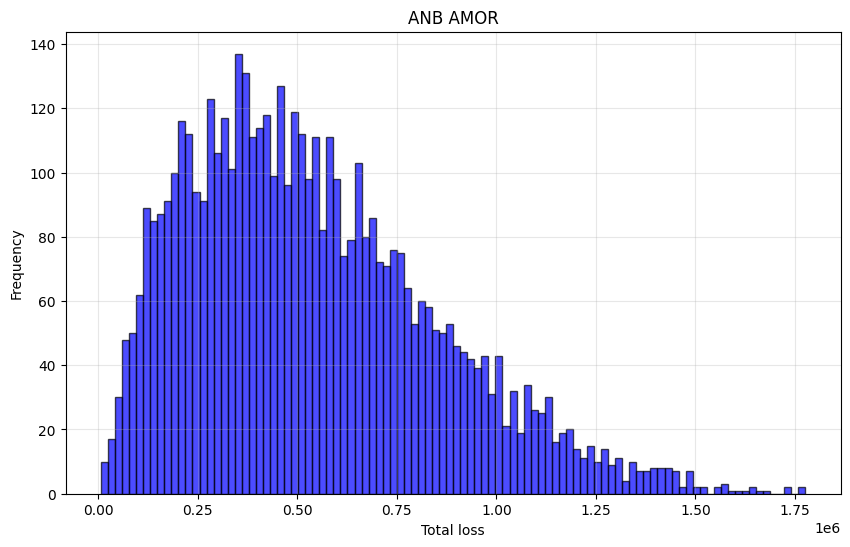

(537627.65, 6750.0, 1776250.0, 500000.0, 0, 2000000.0)

In [46]:
# Parameters
n = 8000 # Number of mortgages
PD = 0.25 # Probability of default 
EAD = 1000 # Exposure per mortgage (euros)
LGD = 0.25 # Loss given default 
rho = 0.25 # Correlation coefficient 
runs = 5000 # Number of simulations

# One-factor model simulation 
def simOneFactor(n, PD, EAD, LGD, rho):
    normDist = stats.norm(0, 1)
    z = normDist.rvs(1) # Systematic factor 
    y = normDist.rvs(n) # Idiosyncratic factors
    r_tilde = np.sqrt(rho) * z + np.sqrt(1 - rho**2) * y # Asset values 
    c = normDist.ppf(PD) # Critical threshold 
    defaults = (r_tilde < c).astype(int) # Default indicator (1 if default)
    losses = defaults * EAD * LGD # Losses per mortgage
    return np.sum(losses) # Total portfolio losses

# Run simulations
losses = np.zeros(runs)
for i in range(runs):
    losses[i] = simOneFactor(n, PD, EAD, LGD, rho)

# Calculate theoretical values 
EL = n * EAD * LGD * PD
min_loss = 0 # Minimum loss (no defaults)
max_loss = n * EAD * LGD # Maximum loss (all mortgages default)

# Sample statistics
average_loss = np.mean(losses)
min_sample_loss = np.min(losses)
max_sample_loss = np.max(losses)

# Plot histogram
plt.figure(figsize=(10,6))
plt.hist(losses, bins=100, color='blue',alpha=0.7,  edgecolor='black')
plt.title("ANB AMOR")
plt.xlabel("Total loss")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()

# Output results
average_loss, min_sample_loss, max_sample_loss, EL, min_loss, max_loss

# NSN Bank

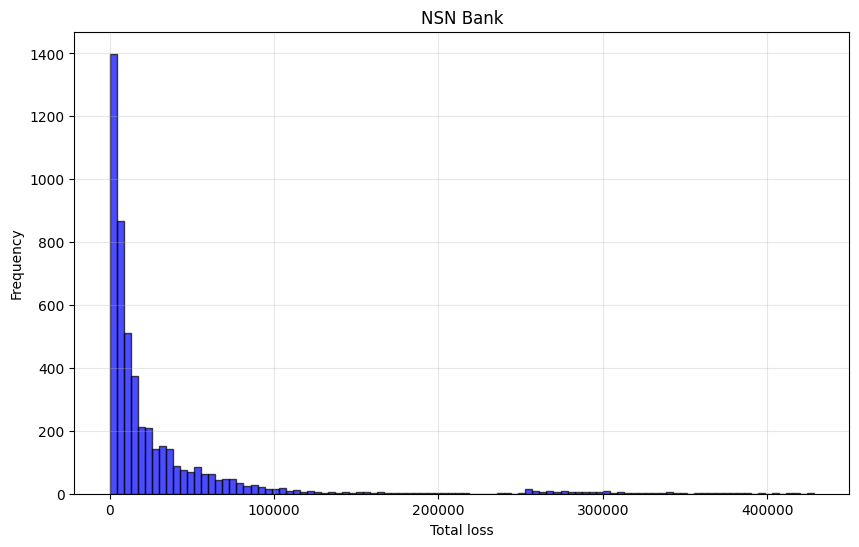

(29375.7, 0.0, 428500.0, 20000.0, 0, 1000000.0)

In [47]:
# Parameters
EAD = np.array([1000] * 1000 + [10000] * 10 + [50000] * 4 + [100000] * 2 + [500000] * 1)  # Exposure amounts
n = len(EAD) # Number of mortgages
PD = 0.02 # Probability of default 
LGD = 0.5 # Loss given default 
rho = 0.25 # Correlation coefficient 
runs = 5000 # Number of simulations

# One-factor model simulation 
def simOneFactor(n, PD, EAD, LGD, rho):
    normDist = stats.norm(0, 1)
    z = normDist.rvs(1) # Systematic factor 
    y = normDist.rvs(n) # Idiosyncratic factors
    r_tilde = np.sqrt(rho) * z + np.sqrt(1 - rho**2) * y # Asset values 
    c = normDist.ppf(PD) # Critical threshold 
    defaults = (r_tilde < c).astype(int) # Default indicator (1 if default)
    losses = defaults * EAD * LGD # Losses per mortgage
    return np.sum(losses) # Total portfolio losses

# Run simulations
losses = np.zeros(runs)
for i in range(runs):
    losses[i] = simOneFactor(n, PD, EAD, LGD, rho)

# Calculate theoretical values 
EL = np.sum(EAD * LGD * PD)
min_loss = 0 # Minimum loss (no defaults)
max_loss = np.sum(EAD * LGD) # Maximum loss (all mortgages default)

# Sample statistics
average_loss = np.mean(losses)
min_sample_loss = np.min(losses)
max_sample_loss = np.max(losses)

# Plot histogram
plt.figure(figsize=(10,6))
plt.hist(losses, bins=100, color='blue',alpha=0.7,  edgecolor='black')
plt.title("NSN Bank")
plt.xlabel("Total loss")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()

# Output results
average_loss, min_sample_loss, max_sample_loss, EL, min_loss, max_loss

# ROBA Bank

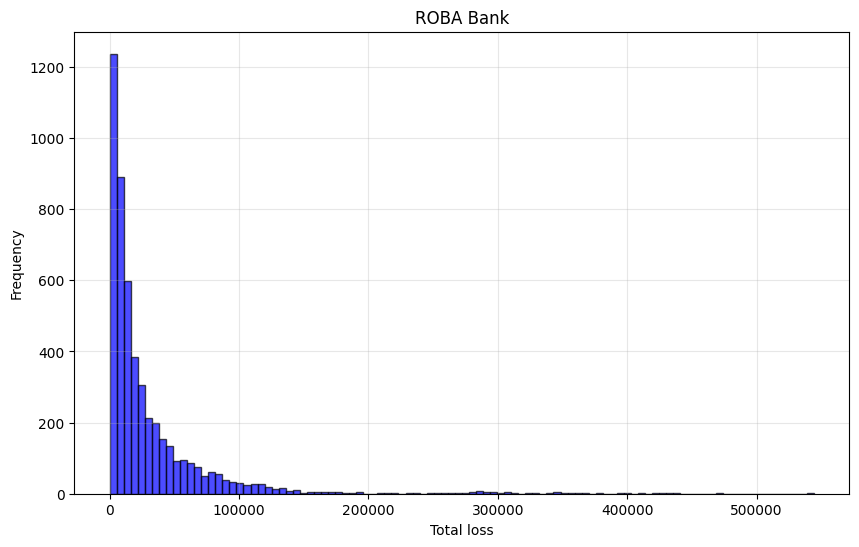

(30502.7, 0.0, 544500.0, 20000.0, 0, 1000000.0)

In [50]:
# Parameters
EAD = np.array([1000] * 1000 + [10000] * 10 + [50000] * 4 + [100000] * 2 + [500000] * 1)  # Exposure amounts
n = len(EAD) # Number of mortgages
PD =  np.array([0.0275] * 1000 + [0.02] * 10 + [0.0175] * 4 + [0.015] * 2 + [0.008] * 1)  # PD values
LGD = 0.5 # Loss given default 
rho = 0.25 # Correlation coefficient 
runs = 5000 # Number of simulations

# One-factor model simulation 
def simOneFactor(n, PD, EAD, LGD, rho):
    normDist = stats.norm(0, 1)
    z = normDist.rvs(1) # Systematic factor 
    y = normDist.rvs(n) # Idiosyncratic factors
    r_tilde = np.sqrt(rho) * z + np.sqrt(1 - rho**2) * y # Asset values 
    c = normDist.ppf(PD) # Critical threshold 
    defaults = (r_tilde < c).astype(int) # Default indicator (1 if default)
    losses = defaults * EAD * LGD # Losses per mortgage
    return np.sum(losses) # Total portfolio losses

# Run simulations
losses = np.zeros(runs)
for i in range(runs):
    losses[i] = simOneFactor(n, PD, EAD, LGD, rho)

# Calculate theoretical values 
EL = np.sum(EAD * LGD * PD)
min_loss = 0 # Minimum loss (no defaults)
max_loss = np.sum(EAD * LGD) # Maximum loss (all mortgages default)

# Sample statistics
average_loss = np.mean(losses)
min_sample_loss = np.min(losses)
max_sample_loss = np.max(losses)

# Plot histogram
plt.figure(figsize=(10,6))
plt.hist(losses, bins=100, color='blue',alpha=0.7,  edgecolor='black')
plt.title("ROBA Bank")
plt.xlabel("Total loss")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()

# Output results
average_loss, min_sample_loss, max_sample_loss, EL, min_loss, max_loss